## Python Implementation of the Finite Element Method

### (1) The 1D Poisson equation
We consider the following 1D equation with a Dirichlet boundary condition
\begin{equation}
\begin{split}
-k\frac{\partial^2 u}{\partial x^2} &= f(x),\quad x\in[0,1] \\
u(0)&=u(1)=0
\end{split}
\end{equation}
where $k>0$ is a constant and $f(x)=1$.

### (1.1) The FEM for solving the 1D Poisson equation

#### Step 1: The weak form 
By choosing test functions  that vanish on the boundary (i.e., $w\in H^1_0(\Omega)$), the boundary term disappears, leading to:
    $$
    \underbrace{-\left[w\frac{\partial u}{\partial x}\right]^1_0}_{=0} + \int_{\Omega} k\frac{\partial u}{\partial x}\cdot\frac{\partial w}{\partial x} ~dx = \int_{\Omega} fw ~dx, \tag{1}
    $$
#### Step 2: The basis functions
The **shape function** (or **base function**) and is defined as:
\begin{equation}
\psi_0(x)= \begin{cases}
\frac{x_{1}-x}{x_{1}-x_{0}},\quad \ x_{0}\leq x\leq x_{1} \\
0,\quad \text{otherwise}
\end{cases}\quad\quad 
\psi_i(x) =
\begin{cases}
\frac{x-x_{i-1}}{x_i-x_{i-1}},\quad \ x_{i-1}\leq x\leq x_i \\
\frac{x_{i+1}-x}{x_{i+1}-x_{i}},\quad \ x_{i}\leq x\leq x_{i+1} \\
0,\quad \text{otherwise}
\end{cases},\ i=1,\cdots,n-1 \quad\quad
\psi_n(x) =
\begin{cases}
\frac{x-x_{n-1}}{x_n-x_{n-1}},\quad \ x_{n-1}\leq x\leq x_n \\
0,\quad \text{otherwise}
\end{cases}
\tag{2}
\end{equation}
They formulate a function space $V=\{\psi_0(x), \psi_1(x), \cdots, \psi_{n-1}(x), \psi_{n}(x)\}$.

**Notes:**
- Smooth shape functions such as Hermite Shape Functions and [Spline-Based Shape Functions](https://www.mdpi.com/2227-7390/8/12/2102).
- They provide advantages such as higher accuracy per DOF(Degree of freedom), better derivative quality, and enable higher continuity. But, they need a more complex implementation, more expensive integration, and less flexibility for discontinuities

#### Step 3: Discretization of the weak formulation

In the 1D case, we discretize the domain $\Omega$ into $n$ nodes (the first node gets index $0$, and the last node is $n$) and approximate the unknown function $u$ using a finite-dimensional subspace. The function $u_h$ is the notation of the discrete function $u$:
$$
u_h = \sum^{n}_{i=0}u_i\cdot \psi_i(x), \tag{3}
$$
where $u_i$ are unknown coefficients and $\psi_i$ are piecewise linear basis functions. 

#### Step 4: Constructing the Stiffness Matrix and formulating the linear system
We insert $u=u_h$ and $w=\psi_i$ into the weak form $(4)$, which leads to the following system:
$$
\int_{\Omega} k \left(\sum^{n}_{j=0}u_j\frac{\partial \psi_j}{\partial x}\right)\frac{\partial \psi_i}{\partial x} ~dx  = \int_{\Omega}f(x)\psi_i~dx,\quad i=1,\cdots, n-1
$$
When multiplying the brackets, the equation can also be written as:
$$
 \sum^{n}_{j=0}\underbrace{\left(\int_{\Omega} k \frac{\partial \psi_j}{\partial x}\frac{\partial \psi_i}{\partial x} ~dx\right)}_{A_{ij}}u_j = \underbrace{\int_{\Omega}f(x)\psi_i~dx}_{b_i},\quad i=1,\cdots,n-1 \tag{4}
$$
This results in the linear system:
$$
A\vec{u} = b, \tag{5}
$$
where $\vec{u}=[u_0,u_1,\cdots,u_{n}]^T$, and the matrix $A\in\mathbb{R}^{n-2\times n}$ with the following form
$$
A_{ij} =
\begin{cases}
\frac{k}{x_i-x_{i-1}} + \frac{k}{x_{i+1}-x_i},\quad i=j \\
-\frac{k}{x_i-x_{i-1}}, \quad j=i-1 \\
    -\frac{k}{x_{i+1}-x_i},\quad j=i+1 \\
0, \quad otherwise
\end{cases},\ i=1,\cdots,n-1
\tag{6}
$$
and $b\in\mathbb{R}^n$ with the following form
$$
b_i = \frac{x_{i+1}-x_{i}}{2} + \frac{x_{i}-x_{i-1}}{2},\ i=1,\cdots,n-1 \tag{7}
$$

In particular, we have
\begin{equation}
\left[
\begin{matrix}
A_{1,0} & A_{1,1}, & A_{1,2},      & \cdots, & \cdots & \cdots & \cdots \\
\vdots  & \ddots,  & \ddots, & \ddots, & \cdots & \cdots & \vdots \\
\cdots       & \cdots  & -\frac{k}{x_{i}-x_{i-1}}, & (\frac{k}{x_{i}-x_{i-1}}+\frac{k}{x_{i+1}-x_{i}}), & -\frac{k}{x_{i+1}-x_{i}} & \cdots & \cdots \\
\vdots  & \cdots  & \cdots & \ddots, & \ddots & \ddots & \vdots \\
\cdots  & \cdots  & \cdots  & \cdots, & A_{n-1,n-2} & A_{n-1,n-1} & A_{n-1,n} 
\end{matrix}
\right]_{n-2\times n} \vec{u} =
\left[
\begin{matrix}
 \frac{x_2-x_0}{2} \\
\vdots \\
\frac{x_{i+1}-x_{i-1}}{2} \\
\vdots \\
 \frac{x_n-x_{n-2}}{2} \\
\end{matrix}
\right]_{n-2\times 1}\tag{8}
\end{equation}

## (2) Dirichlet Boundary Conditions (i.e., $u_0, u_{n}$ are given)
In this case, we have
\begin{equation}
\left[
\begin{matrix}
A_{1,1} & A_{1,2}      & \cdots & \cdots & \cdots \\
\ddots  & \ddots & \ddots & \cdots & \cdots\\
\cdots  & -\frac{k}{x_{i}-x_{i-1}} & (\frac{k}{x_{i}-x_{i-1}}+\frac{k}{x_{i+1}-x_{i}}) & -\frac{k}{x_{i+1}-x_{i}} & \cdots \\
\cdots  & \cdots & \ddots & \ddots & \ddots  \\
\cdots  & \cdots  & \cdots & A_{n-1,n-2} & A_{n-1,n-1}\\
\end{matrix}
\right]_{n-2\times n-2} \tilde{u} =
\left[
\begin{matrix}
 \frac{x_2-x_0}{2} - A_{1,0}u_0 \\
\vdots \\
\frac{x_{i+1}-x_{i-1}}{2} \\
\vdots \\
 \frac{x_n-x_{n-2}}{2} - A_{n-1,n}u_{n}  \\
\end{matrix}
\right]_{n-2\times 1}\tag{9}
\end{equation}
where $\tilde{u}=\{u_1,\cdots, u_{n-1}\}$ and 
$$
u_{fem}(x) = \sum^{n}_{i=0}u_i\cdot \psi_i(x)
$$

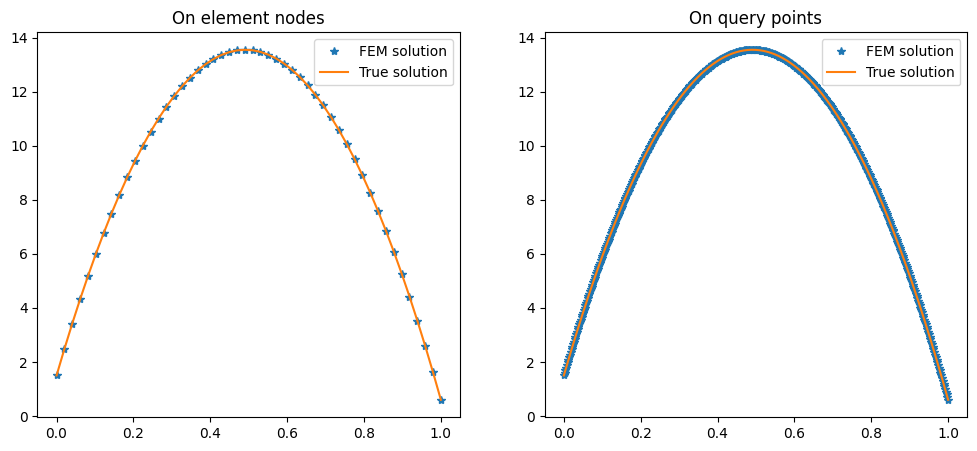

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class FEM():

    def __init__(self, N=100, kappa=0.001, u0=0., uN=0.):
        self.x = np.linspace(0, 1, N)
        #
        A = self.get_A(N, kappa, self.x)
        b = self.get_b(N, kappa, self.x, u0, uN)
        #
        self.u_fem = np.zeros(N); 
        self.u_fem[0] = u0; 
        self.u_fem[-1] = uN;
        self.u_fem[1:-1] = np.linalg.solve(A, b)
        
    @property
    def _u(self):
        return self.u_fem

    @property
    def _x(self):
        return self.x

    def get_A(self, N, kappa, x):
        '''The matix A: size(N-2, N-2)'''
        A = np.zeros((N-2, N))
        # The rows from 1 to n-1: i=1,...,n-1
        for i in range(1,N-1):
            A[i-1,i] = 1/(x[i]-x[i-1]) + 1/(x[i+1]-x[i])
            A[i-1,i-1] = -1/(x[i]-x[i-1])
            A[i-1,i+1] = -1/(x[i+1]-x[i])
    
        return A[:,1:-1] * kappa

    def get_b(self, N, kapa, x, u0, uN):
        '''The vector b: size(N-2, 1)'''
        b = np.zeros(N-2)
        for i in range(1,N-1):
            b[i-1] = 0.5 * (x[i+1] - x[i-1])
        # # The boundary conditions
        b[0]  -= - u0 * kappa /(x[1]-x[0])
        b[-1] -= - uN * kappa /(x[-1]-x[-2])
    
        return b

    def uh(self, x_query, x_nodes, u_nodes):
        """
        Predicts the FEM solution u_h(x) at a point or array of points x_query
        using linear interpolation over the FEM mesh.
    
        Parameters:
        - x_query : float or np.ndarray
            Position(s) at which to evaluate the FEM solution.
        - x_nodes : np.ndarray
            Coordinates of the mesh nodes.
        - u_nodes : np.ndarray
            Solution values at the mesh nodes (from FEM).
    
        Returns:
        - u_query : float or np.ndarray
            Interpolated solution at x_query.
        """
        x_query = np.atleast_1d(x_query)
        u_query = np.zeros_like(x_query)
    
        for j, x0 in enumerate(x_query):
            # Handle boundary cases
            if x0 <= x_nodes[0]:
                u_query[j] = u_nodes[0]
            elif x0 >= x_nodes[-1]:
                u_query[j] = u_nodes[-1]
            else:
                # Find the element [x_i, x_{i+1}] that contains x0
                i = np.searchsorted(x_nodes, x0) - 1
                xL, xR = x_nodes[i], x_nodes[i+1]
                uL, uR = u_nodes[i], u_nodes[i+1]
    
                # Linear interpolation (shape functions)
                phi_L = (xR - x0) / (xR - xL)
                phi_R = (x0 - xL) / (xR - xL)
                u_query[j] = phi_L * uL + phi_R * uR
    
        return u_query if len(u_query) > 1 else u_query[0]
        
#
kappa = 0.01
u0, uN = 1.5, 0.6
#
N = 50
sol = FEM(N, kappa, u0, uN)
x = sol._x
u_fem = sol._u
#
# Plot the numerical solution
u_true = lambda x: -x**2/(2*kappa) + x*(1/2/kappa+uN-u0) + u0
#
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].plot(x, u_fem, '*', label='FEM solution')
axes[0].plot(x, u_true(x), '-', label='True solution')
axes[0].set_title('On element nodes')
axes[0].legend()
#
x_fine = np.linspace(0,1,500)
axes[1].plot(x_fine, sol.uh(x_fine, sol._x, sol._u), '*', label='FEM solution')
axes[1].plot(x_fine, u_true(x_fine), '-', label='True solution')
axes[1].set_title('On query points')
axes[1].legend()
#
plt.show()

### (2.1) The accuracy 
The relative $L^2$ error between the solution $u_{h}$ and the truth $u_{true}$ is defined as follows:
$$
error =\frac{\|u-u_h\|_{L^2}}{\|u\|_{L^2}}= \sqrt{\frac{\int_{\Omega}(u(x)-u_h(x))^2~dx}{\int_{\Omega}u^2(x)~dx}}
$$
#### Relationship between $L^2$ error and element size $h$
$$error \propto \mathcal{O}(h^2)$$
where $h$ is the **maximum element size** (i.e., mesh spacing).

[0.012345679012345678, 0.0027700831024930744, 0.0006574621959237343, 0.0001602307322544464, 0.0001020304050607081, 2.52518875785965e-05]
[0.011111018618198097, 0.002493054038983965, 0.0005917110506659081, 0.00014420645857470617, 9.182660022500982e-05, 2.272650935486069e-05]


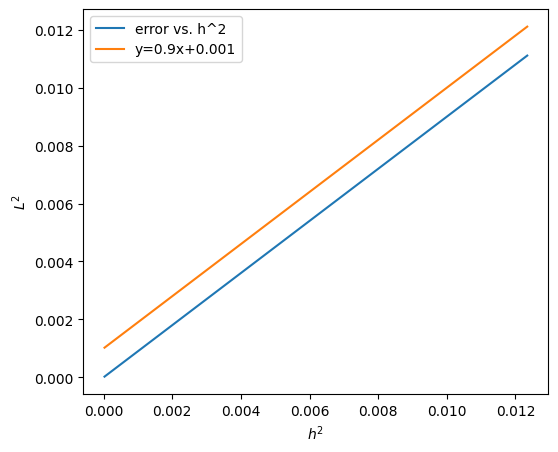

In [3]:
N_list = [10, 20, 40, 80, 100, 200]
err_list = []
h_list = []
#
kapa=0.01; u0=1.; uN=1.2
u_fun = lambda x: -x**2/(2*kappa) + x*(1/2/kappa+uN-u0) + u0
#
for N in N_list:
    sol = FEM(N, kapa, u0, uN)
    #
    x_test = np.linspace(0,1,500)
    u_fem = sol.uh(x_test, sol._x, sol._u)
    u_true = u_fun(x_test)
    #
    error = np.sqrt(np.sum((u_true-u_fem)**2)/np.sum(u_true**2))
    err_list.append(error)
    h_list.append((sol._x[1]-sol._x[0])**2)
#
print(h_list)
print(err_list)
#
plt.figure(figsize=(6,5))
plt.plot(h_list, err_list, label='error vs. h^2')
plt.plot(np.array(h_list), 0.9*np.array(h_list)+0.001, label='y=0.9x+0.001')
plt.xlabel(r'$h^2$')
plt.ylabel(r'$L^2$')
plt.legend()
plt.show()

### (3) Non-constant source term $f(x)$
We consider the following 1D equation with 
\begin{equation}
\begin{split}
-k\frac{\partial^2 u}{\partial x^2} &= f(x),\quad x\in[0,1] \\
u(0)&=u(1)=0
\end{split}
\end{equation}
where $k>0$ is a constant and $f(x)=sin(2\pi x)$.

#### The linear system
In this case, the right-hand side $b\in\mathbb{R}^{n-2}$ has the following form
$$
b_i = \int^{x_{i+1}}_{x_i}\frac{x_{i+1}-x}{x_{i+1}-x_i}f(x)~dx + \int^{x_i}_{x_{i-1}}\frac{x-x_{i-1}}{x_i-x_{i-1}}f(x)~dx,\ i=1,\cdots,n-1.
$$
Therefore, we have
\begin{equation}
\left[
\begin{matrix}
A_{1,1} & A_{1,2}      & \cdots & \cdots & \cdots \\
\ddots  & \ddots & \ddots & \cdots & \cdots\\
\cdots  & -\frac{k}{x_{i}-x_{i-1}} & (\frac{k}{x_{i}-x_{i-1}}+\frac{k}{x_{i+1}-x_{i}}) & -\frac{k}{x_{i+1}-x_{i}} & \cdots \\
\cdots  & \cdots & \ddots & \ddots & \ddots  \\
\cdots  & \cdots  & \cdots & A_{n-1,n-2} & A_{n-1,n-1}\\
\end{matrix}
\right]_{n-2\times n-2} \tilde{u} =
\left[
\begin{matrix}
 b_1 - A_{1,0}u_0 \\
\vdots \\
b_i \\
\vdots \\
b_{n-1}- A_{n-1,n}u_n \\
\end{matrix}
\right]_{n-2\times 1}\tag{10}
\end{equation}
where $\tilde{u}=\{u_1,\cdots,u_{n-1}\}$.

### (3.1) The Gaussian quadrature rule for computing $b_i$
**Gaussian quadrature** is a numerical integration method that approximates the integral of a function using a weighted sum of the function values at specific points (Gauss points) within the domain of integration.

For integrating a function $f(x)$ over the interval $[-1, 1]$:
$$
\int^1_{-1} f(x)~dx \approx \sum^n_{i=1}w_if(x_i)
$$
Where:
- $x_i$: the Gauss nodes (evaluation points),
- $w_i$: the weights,
- $n$: the number of quadrature points.

**Important Notes:**
- Gaussian quadrature is exact for all polynomials of degree $\leq 2n-1$.
- The points $x_i$ are roots of [Legendre polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials) $P_n(x)$.

**A special case: 3-Point Gauss Quadrature**
- Nodes:
$$x_1 = -\sqrt{3/5}, \quad x_2 = 0, \quad x_3 = \sqrt{3/5}$$
- Weights:
$$w_1 = w_3 = 5/9, \quad w_2 = 8/9$$
- Q: Exact for polynomials up to what degree?

**For general integral interval [a,b]:**

First, change of variables:
$$
\int^b_{a} f(x)~dx = \frac{b-a}{2}\int^1_{-1}f(\frac{b-a}{2}\xi + \frac{b+a}{2})~d\xi
$$
Then, apply Gaussian quadrature on the transformed integral.

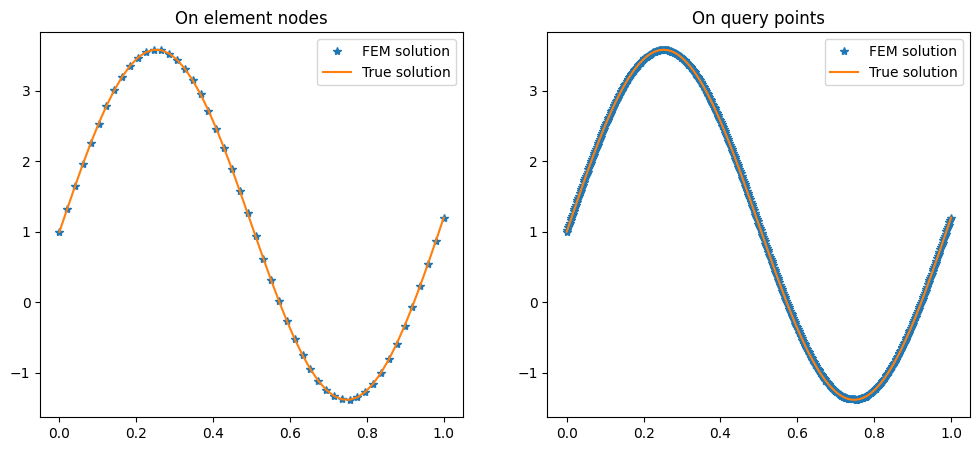

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class FEM():

    def __init__(self, N=100, kappa=0.001, u0=0., uN=0.):
        self.x = np.linspace(0, 1, N)
        self.f = lambda x: np.sin(2 * np.pi * x)
        # 3-point Gauss quadrature on [-1,1]
        self.gauss_pts = np.array([-np.sqrt(3/5), 0.0, np.sqrt(3/5)])
        self.weights = np.array([5/9, 8/9, 5/9])
        #
        A = self.get_A(N, kappa, self.x)
        b = self.get_b(N, kappa, self.x, u0, uN)
        #
        self.u_fem = np.zeros(N); 
        self.u_fem[0] = u0; 
        self.u_fem[-1] = uN;
        self.u_fem[1:-1] = np.linalg.solve(A, b)
        
    @property
    def _u(self):
        return self.u_fem

    @property
    def _x(self):
        return self.x

    def get_A(self, N, kappa, x):
        '''The matix A'''
        A = np.zeros((N-2, N))
        # The rows from 1 to n-1: i=1,...,n-1
        for i in range(1,N-1):
            A[i-1,i] = 1/(x[i]-x[i-1]) + 1/(x[i+1]-x[i])
            A[i-1,i-1] = -1/(x[i]-x[i-1])
            A[i-1,i+1] = -1/(x[i+1]-x[i])

        return A[:,1:-1] * kappa

    def get_b(self, N, kapa, x, u0, uN):
        '''The vector b'''
        b = np.zeros(N-2)
        for i in range(1,N-1):
            for gp, w in zip(self.gauss_pts, self.weights):
                ###############################  The interval: [x_{i-1}, x_i]
                # Map reference point gp in [-1, 1] to physical coordinate xg in [x_{i-1}, x_i]
                xg = 0.5 * (x[i] + x[i-1]) + 0.5 * (x[i]-x[i-1]) * gp
                # Evaluate shape functions at gp (linear basis)
                phi = (xg - x[i-1]) / (x[i] - x[i-1])
                b[i-1] += w * self.f(xg) * phi * (x[i] - x[i-1]) / 2
                ############################### The interval: [x_i, x_{i+1}]
                # Map reference point gp in [-1, 1] to physical coordinate xg in [x_i, x_{i+1}]
                xg = 0.5 * (x[i+1] + x[i]) + 0.5 * (x[i+1]-x[i]) * gp
                # Evaluate shape functions at gp (linear basis)
                phi = (x[i+1] - xg) / (x[i+1] - x[i])
                b[i-1] += w * self.f(xg) * phi * (x[i+1] - x[i]) / 2
        # # The boundary conditions
        b[0]  -= - u0 * kappa /(x[1]-x[0])
        b[-1] -= - uN * kappa /(x[-1]-x[-2])
    
        return b

    def uh(self, x_query, x_nodes, u_nodes):
        """
        Predicts the FEM solution u_h(x) at a point or array of points x_query
        using linear interpolation over the FEM mesh.
    
        Parameters:
        - x_query : float or np.ndarray
            Position(s) at which to evaluate the FEM solution.
        - x_nodes : np.ndarray
            Coordinates of the mesh nodes.
        - u_nodes : np.ndarray
            Solution values at the mesh nodes (from FEM).
    
        Returns:
        - u_query : float or np.ndarray
            Interpolated solution at x_query.
        """
        x_query = np.atleast_1d(x_query)
        u_query = np.zeros_like(x_query)
    
        for j, x0 in enumerate(x_query):
            # Handle boundary cases
            if x0 <= x_nodes[0]:
                u_query[j] = u_nodes[0]
            elif x0 >= x_nodes[-1]:
                u_query[j] = u_nodes[-1]
            else:
                # Find the element [x_i, x_{i+1}] that contains x0
                i = np.searchsorted(x_nodes, x0) - 1
                xL, xR = x_nodes[i], x_nodes[i+1]
                uL, uR = u_nodes[i], u_nodes[i+1]
    
                # Linear interpolation (shape functions)
                phi_L = (xR - x0) / (xR - xL)
                phi_R = (x0 - xL) / (xR - xL)
                u_query[j] = phi_L * uL + phi_R * uR
    
        return u_query if len(u_query) > 1 else u_query[0]
        
#
kappa = 0.01
u0, uN = 1., 1.2
#
N = 50
sol = FEM(N, kappa, u0, uN)
x = sol._x
u_fem = sol._u
#
# Plot the numerical solution
u_true = lambda x: np.sin(2*np.pi*x)/(4*np.pi**2*kappa) + (uN-u0) * x + u0
#
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].plot(x, u_fem, '*', label='FEM solution')
axes[0].plot(x, u_true(x), '-', label='True solution')
axes[0].set_title('On element nodes')
axes[0].legend()
#
x_fine = np.linspace(0,1,500)
axes[1].plot(x_fine, sol.uh(x_fine, sol._x, sol._u), '*', label='FEM solution')
axes[1].plot(x_fine, u_true(x_fine), '-', label='True solution')
axes[1].set_title('On query points')
axes[1].legend()
#
plt.show()

[0.012345679012345678, 0.0027700831024930744, 0.0006574621959237343, 0.0001602307322544464, 0.0001020304050607081, 2.52518875785965e-05]
[0.03818984082356356, 0.0086399465683409, 0.0020543748610025946, 0.0005008881986607644, 0.00031896745385821856, 7.894767383435297e-05]


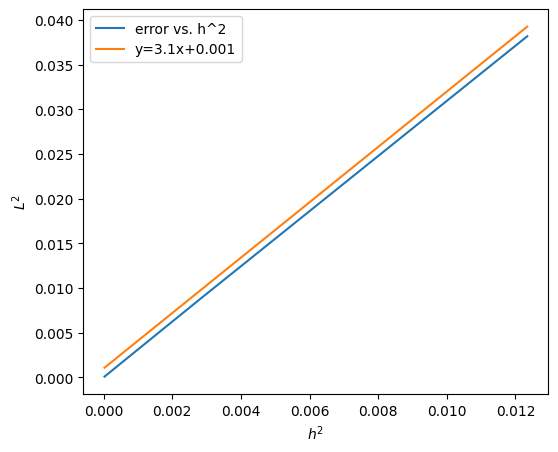

In [5]:
N_list = [10, 20, 40, 80, 100, 200]
err_list = []
h_list = []
#
kapa=0.01; u0=1.; uN=1.2
u_fun = lambda x: np.sin(2*np.pi*x)/(4*np.pi**2*kappa) + (uN-u0) * x + u0
#
for N in N_list:
    sol = FEM(N, kapa, u0, uN)
    #
    x_test = np.linspace(0,1,500)
    u_fem = sol.uh(x_test, sol._x, sol._u)
    u_true = u_fun(x_test)
    #
    error = np.sqrt(np.sum((u_true-u_fem)**2)/np.sum(u_true**2))
    err_list.append(error)
    h_list.append((sol._x[1]-sol._x[0])**2)
#
print(h_list)
print(err_list)
#
plt.figure(figsize=(6,5))
plt.plot(h_list, err_list, label='error vs. h^2')
plt.plot(np.array(h_list), 3.1*np.array(h_list)+0.001, label='y=3.1x+0.001')
plt.xlabel(r'$h^2$')
plt.ylabel(r'$L^2$')
plt.legend()
plt.show()

### (4) Summary

In [ ]:
- 1, arbitrary geometries (>FDM)
- 2, more elements, more accurate
- 3, approximate the solution with basis functions (shape functions) (>FDM)
- 4, able to make predictions on random positions (>FDM)
- 5, curse-of-dimensionality (why?)

## Exercises 
### Task 1: solving 1D Poisson equation with hybrid boundary conditions

Consider a steady-state 1D Darcy flow equation for pressure $p(x)$ in a porous medium:
$$
- \frac{d}{dx} \left(k(x)\frac{dp}{dx} \right) = f(x), \quad x \in (0, L) \tag{1}
$$
where:
- $k(x)=0.01$ is the permeability field.
- $f(x)=1$ is a source term (forcing function).
- $L=1$ is the length of the domain.

The boundary conditions are given:
$$
p(0) = 1, \quad k(x)\frac{\partial p}{\partial \vec{n}}|_{x=L} = g_1\Longrightarrow k(L)p'(L)=0.2.
$$

#### Hint: 
Let's multiply $\psi_{n}(x)$ to both side of the PDE and obtain:
$$
\left[-\psi_n(x)k(x)p'(x)\right]^{x_n}_{x_0} +\int^{x_n}_{x_0}k(x)p'(x)\psi'_n(x)~dx = \int^{x_n}_{x_0}f(x)\psi_n(x)~dx
$$
We replace $p(x)$ with the approximation
$$
p_h(x) = \sum^n_{j=0}p_j\psi_j(x)
$$
which leads to
$$
- \underbrace{\psi_n(x_n)}_{=1}\underbrace{k(x_n)p'(x_n)}_{g_1} + p_{n-1}\underbrace{\int^{x_n}_{x_{n-1}}k(x)\psi'_{n-1}(x)\psi'_n(x)~dx}_{A_{n,n-1}} +p_n\underbrace{\int^{x_n}_{x_{n-1}}k(x)\psi'_n(x)\psi'_n(x)~dx}_{A_{n,n}} = \underbrace{\int^{x_n}_{x_{n-1}}f(x)\psi_n(x)~dx}_{b_n}.
$$
The above equation can be simplified as
$$
- g_1 + p_{n-1}\frac{-1}{x_n-x_{n-1}} + p_n\frac{1}{x_n-x_{n-1}} = \frac{x_n-x_{n-1}}{2}.
$$

### Task 2: Solving the 1D Darcy’s Flow Problem with FEM

Darcy’s law describes the flow of a fluid through a porous medium. In 1D, it is given by the steady-state equation:
$$
-\frac{d}{dx} \left( k(x) \frac{d p}{dx} \right) = f(x), \quad x \in [0,1]
$$
where:
- $p(x)$ is the pressure (unknown),
- $k(x)= (1 + \sin(\frac{3\pi}{2}x))/3$ is the permeability of the medium,
- $f(x)=\frac{3\pi^2}{4}(\cos(\frac{3\pi}{2}x)+\sin(3\pi x))$ is an external source term.

We impose Dirichlet boundary conditions:
$$
p(0) = 1, \quad p(1) = 0
$$


#### Hint:
In this case, the matrix $A\in\mathbb{R}^{n-2\times n}$ with the following form
$$
A_{ij} =
\begin{cases}
\frac{1}{(x_i-x_{i-1})^2}\int^{x_i}_{x_{i-1}}k(x)~dx + \frac{1}{(x_{i+1}-x_i)^2}\int^{x_{i+1}}_{x_i}k(x)~dx,\quad i=j \\
-\frac{1}{(x_i-x_{i-1})^2}\int^{x_i}_{x_{i-1}}k(x)~dx , \quad j=i-1 \\
    -\frac{1}{(x_{i+1}-x_i)^2}\int^{x_{i+1}}_{x_i}k(x)~dx,\quad j=i+1 \\
0, \quad otherwise
\end{cases},\ i=1,\cdots,n-1
\tag{6}
$$
and right-hand side $b\in\mathbb{R}^{n-2}$ has the following form
$$
b_i = \int^{x_{i+1}}_{x_i}\frac{x_{i+1}-x}{x_{i+1}-x_i}f(x)~dx + \int^{x_i}_{x_{i-1}}\frac{x-x_{i-1}}{x_i-x_{i-1}}f(x)~dx,\ i=1,\cdots,n-1.
$$
Therefore, we have
\begin{equation}
A_{n-2\times n-2} = \left[
\begin{matrix}
A_{1,1} & A_{1,2}      & \cdots & \cdots & \cdots \\
\ddots  & \ddots & \ddots & \cdots & \cdots\\
\cdots  & -\frac{1}{(x_i-x_{i-1})^2}\int^{x_i}_{x_{i-1}}k(x)~dx & (\frac{1}{(x_i-x_{i-1})^2}\int^{x_i}_{x_{i-1}}k(x)~dx + \frac{1}{(x_{i+1}-x_i)^2}\int^{x_{i+1}}_{x_i}k(x)~dx) & -\frac{1}{(x_{i+1}-x_i)^2}\int^{x_{i+1}}_{x_i}k(x)~dx & \cdots \\
\cdots  & \cdots & \ddots & \ddots & \ddots  \\
\cdots  & \cdots  & \cdots & A_{n-1,n-2} & A_{n-1,n-1}\\
\end{matrix}
\right]
\end{equation}
and 
\begin{equation}
b_{n-1\times 1}=\left[
\begin{matrix}
 b_1 - A_{1,0}u_0 \\
\vdots \\
b_i \\
\vdots \\
b_{n-1}- A_{n-1,n}u_n \\
\end{matrix}
\right].
\end{equation}